# Projeto Ciência de Dados - Previsão de Vendas

- Prever as vendas com base nos gastos em anúncios de: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

# Instalação das bibliotecas

In [1]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

# Importação das bibliotecas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# leitura da base de dados

In [3]:
#vendas = pd.read_csv("C:\\Users\\mabes\\OneDrive\\Documentos\LPII - python para machine learning (2021-2)\\datasets\\vendas.csv")
vendas = pd.read_csv("/content/vendas.csv")

In [4]:
display(vendas)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise de dados

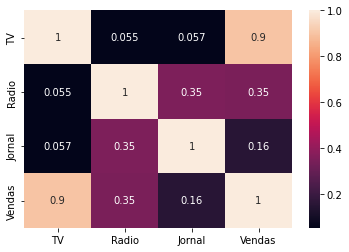

In [5]:
sns.heatmap(vendas.corr(), annot = True)

In [6]:
vendas.corr()

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


#### Dividindo os dados em X, y

In [7]:
X = vendas[["TV", "Radio", "Jornal"]]
y = vendas["Vendas"]

In [8]:
display(X)

,TV,Radio,Jornal
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [9]:
display(y)

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Vendas, Length: 200, dtype: float64

# Problema de regressão - vamos escolher os modelos:

- Regressão Linear
- RandomForest (Árvore de Decisão)

#### Criando os modelos

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
modelo_regressao_linear = LinearRegression()
modelo_random_forest = RandomForestRegressor()

#### Dividindo os dados em treinamento e teste

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% para treinamento

#### Treinando o modelo

In [ ]:
modelo_regressao_linear.fit(X_train, y_train)
modelo_random_forest.fit(X_train, y_train)

In [13]:
previsao_regressao_linear = modelo_regressao_linear.predict(X_test)
previsao_random_forest = modelo_random_forest.predict(X_test)

#### Avaliação do Melhor Modelo

- Vamos usar o R²: diz o % que o nosso modelo consegue explicar o que acontece

In [14]:
from sklearn import metrics
print(metrics.r2_score(y_test, previsao_regressao_linear))
print(metrics.r2_score(y_test, previsao_random_forest))

0.8967391143250009
0.9102489921766426


#### Visualização Gráfica das Previsões

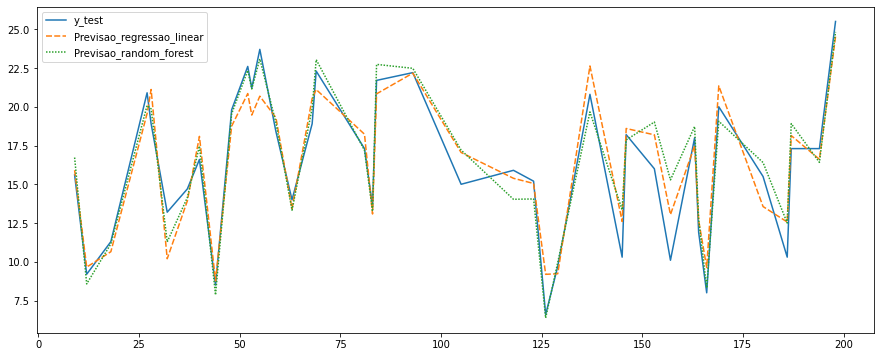

In [15]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_test"] = y_test
tabela_auxiliar["Previsao_regressao_linear"] = previsao_regressao_linear
tabela_auxiliar["Previsao_random_forest"] = previsao_random_forest
plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

# Fazendo previsões

#### Lendo as informações para as previsões

In [16]:
#vendas_novas = pd.read_csv("C:\\Users\\mabes\\OneDrive\\Documentos\LPII - python para machine learning (2021-2)\\datasets\\vendas_novas.csv")
vendas_novas = pd.read_csv("/content/vendas_novas.csv")

In [17]:
display(vendas_novas)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [18]:
previsao_vendas_novas = modelo_random_forest.predict(vendas_novas)
print(previsao_vendas_novas)

[ 7.203  8.459 20.565]
